### Score: 41

Q1.[2+4+5]

Q2.[9+7]

Q3.[4+10]

C:\Users\zjm\AppData\Local\Temp\ipykernel_14036\2507193076.py:15: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  xch4 = dataset.variables['xch4'][:]


(210, 36, 72)
(36, 72)


IndexError: index 12 is out of bounds for axis 0 with size 12

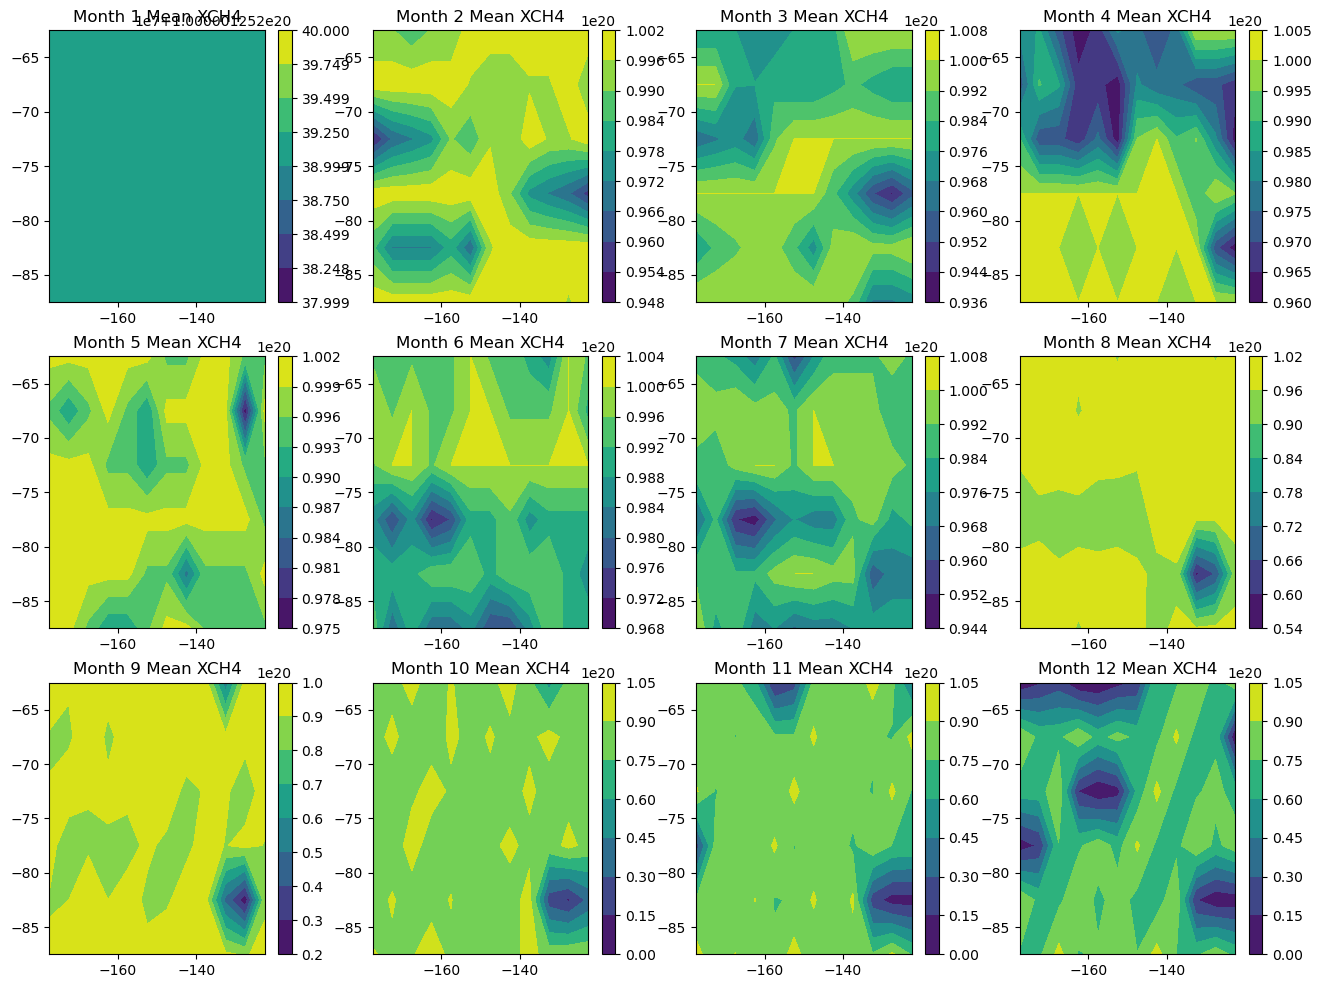

In [10]:
# 第一题
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from netCDF4 import num2date
import matplotlib.dates as mdates
import datetime

dataset = nc.Dataset(r'C:\Users\zjm\Desktop\ESE_5023\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc', mode='r')
# print(dataset.variables.keys())
time = dataset.variables['time'][:]
latitude = dataset.variables['lat'][:]
longitude = dataset.variables['lon'][:]
xch4 = dataset.variables['xch4'][:]  
time_units = dataset.variables['time'].units
calendar = dataset.variables['time'].calendar  
times = num2date(time[:], units=time_units, calendar=calendar)

missing_value = getattr(dataset.variables['xch4'], '_FillValue', None)
if missing_value is not None:
    xch4 = np.ma.masked_equal(xch4, missing_value) # 处理缺失数据

xch4_shape = xch4.shape 
xch4_units = dataset.variables['xch4'].units 
# print(f"甲烷变量（xch4）的形状: {xch4_shape}")
# print(f"甲烷变量（xch4）的单位: {xch4_units}")
# print(times) # 进行检查查看
 
# 1.1 计算每月的甲烷气候学（平均值）并绘制在12个面板上
print(xch4.shape)
# NOTE: 这样计算的平均值是所有月份的平均值 -1
monthly_mean_xch4 = np.mean(xch4, axis=0)  # 按时间轴（第一个轴）计算平均值
print(monthly_mean_xch4.shape)
lat_points = 6 
lon_points = 12  # 使得lat_points * lon_points = 72 基于 xch4 变量的第三个维度（长度为72）
# NOTE: 36不是时间维数
monthly_mean_reshaped = monthly_mean_xch4.reshape((36, lat_points, lon_points)) # 将monthly_mean_xch4数组重塑为一个三维数组

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
for month in range(36):  # 基于 xch4 变量的第二个维度（长度为36）
    # NOTE: 这里的数据超过了12个（即子图数量），因此报错 -1
    ax = axes.flat[month]
    data_for_plot = monthly_mean_reshaped[month, :, :]
    # NOTE: 题目要求是画浓度分布图，而不是等值线图 -1
    cs = ax.contourf(longitude[:lon_points], latitude[:lat_points], data_for_plot, cmap='viridis')
    ax.set_title(f'Month {month+1} Mean XCH4')
    plt.colorbar(cs, ax=ax)
plt.tight_layout()
plt.show()

In [11]:
# 1.2 绘制2003-01年至2020-06年全球平均甲烷的时间序列
times = num2date(dataset.variables['time'][:], units=dataset.variables['time'].units, calendar=dataset.variables['time'].calendar) # 将NetCDF数据集中的时间变量从数值形式转换为datetime对象数组
mdates_times = mdates.date2num(times) # 将这些datetime对象转换回matplotlib可以理解的数值形式
 
plt.figure(figsize=(10, 6))
# NOTE: global_mean_xch4未定义 -1
plt.plot(mdates_times, global_mean_xch4, label='Global Mean XCH4')
plt.title('Global Mean XCH4 Time Series (2003-01 to 2020-06)')

# 设置x轴的日期时间格式化器
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend()
plt.show()

NameError: name 'global_mean_xch4' is not defined

<Figure size 1000x600 with 0 Axes>

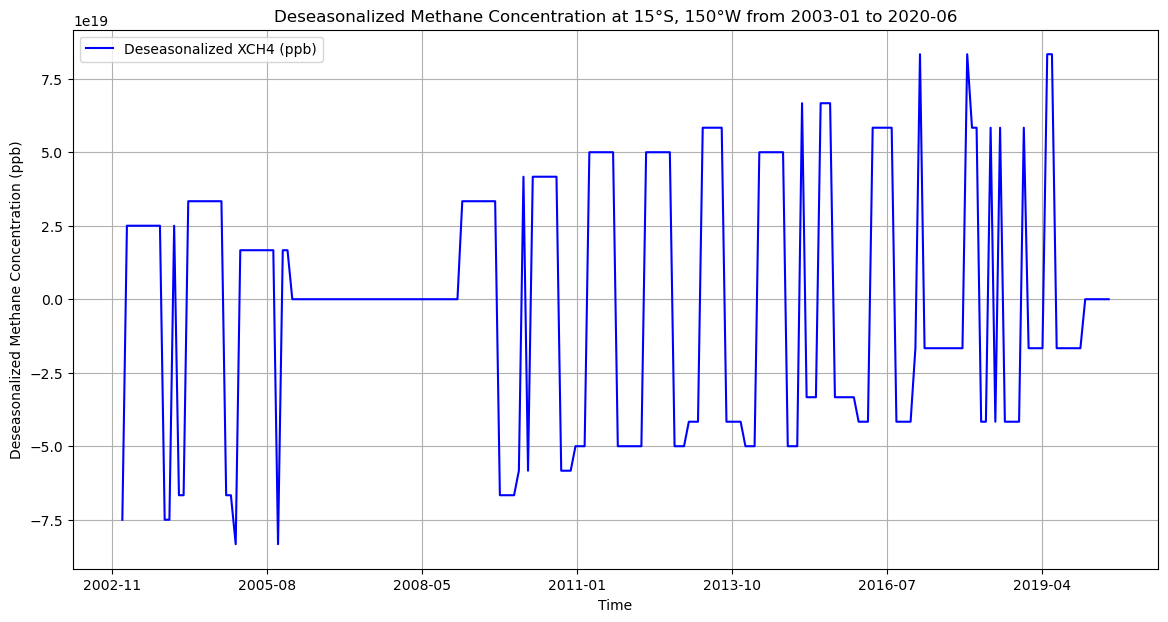

In [12]:
# 1.3 将2003-01年至2020-06年[15°S，150°W]点的甲烷去季节化水平绘制为时间序列。描述你的结果
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from datetime import datetime, timedelta
import datetime

lat_idx = (np.abs(latitude - (-15.0))).argmin()  # 找到最接近 -15.0 的索引
lon_idx = (np.abs(longitude - (-150.0))).argmin()  # 找到最接近 -150.0 的索引
 
xch4_at_point = xch4[:, lat_idx, lon_idx] # 提取指定位置的数据
 
times_datetime = [datetime.datetime(t.year, t.month, t.day, t.hour, t.minute, t.second) for t in times]
times_matplotlib = mdates.date2num(times_datetime) 
 
# 去季节化处理：计算每年每月的平均值，并从原始数据中减去这些平均值
num_years = int(len(xch4_at_point) / 12) # 计算数据中包含的年份数。结果转换为整数
deseasonalized_xch4 = np.zeros_like(xch4_at_point)
 
# 计算每年每月的平均值
yearly_monthly_mean = np.zeros((num_years, 12))
for y in range(num_years):
    start_idx = y * 12
    end_idx = start_idx + 12
    yearly_monthly_mean[y, :] = np.mean(xch4_at_point[start_idx:end_idx], axis=0) # 计算了当前年份每个月的甲烷浓度平均值

# 从原始数据中减去每年对应月份的平均值
for y in range(num_years):
    start_idx = y * 12
    end_idx = start_idx + 12
    for m in range(12):
        deseasonalized_xch4[start_idx + m] = xch4_at_point[start_idx + m] - yearly_monthly_mean[y, m]
 
# 绘制时间序列图
plt.figure(figsize=(14, 7))
plt.plot(times_matplotlib, deseasonalized_xch4, label='Deseasonalized XCH4 (ppb)', color='b')
plt.xlabel('Time')
plt.ylabel('Deseasonalized Methane Concentration (ppb)')
plt.title('Deseasonalized Methane Concentration at 15°S, 150°W from 2003-01 to 2020-06')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()

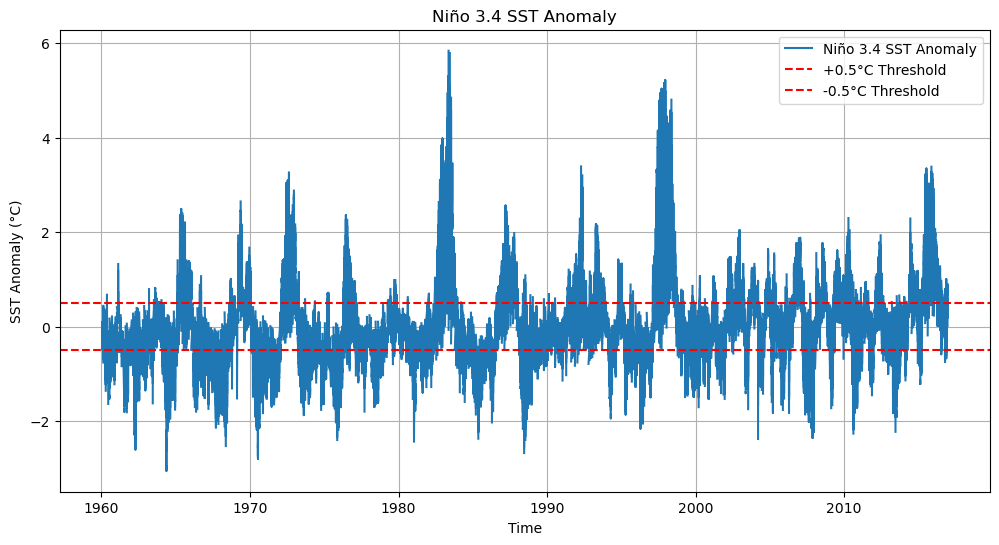

In [13]:
# 第二题
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2.1 计算厄尔尼诺3.4区域SST的月度气候学，并从SST时间序列中减去气候学以获得异常。
file_path = r'C:\Users\zjm\Desktop\ESE_5023\NOAA_NCDC_ERSST_v3b_SST.nc' 
ds = xr.open_dataset(file_path)

lat_range = slice(-5, 5)
# NOTE: 应该筛选190-240 -1
lon_range = slice(260, 310)  # 170W-120W等价于260E-310E
sst = ds['sst'].loc[dict(lat=lat_range, lon=lon_range)]
 
monthly_climatology = sst.groupby('time.month').mean('time') # 计算月度气候学（每个月的平均SST）
 
# 计算SST异常（从原始SST中减去月度气候学）
sst_anomaly = sst.groupby('time.month') - monthly_climatology
 
# 将SST异常转换为pandas DataFrame以便更容易处理时间序列
sst_anomaly_df = sst_anomaly.to_dataframe().reset_index()
sst_anomaly_df['time'] = pd.to_datetime(sst_anomaly_df['time']) # 转换为datetime类型
sst_anomaly_df.set_index('time', inplace=True) # 将'time'列的数据类型转换为datetime类型
 
# 2.2 将计算出的厄尔尼诺现象可视化
# NOTE: 这里需要依照例图进行绘制，且没有计算滑动平均 -3
plt.figure(figsize=(12, 6))
plt.plot(sst_anomaly_df.index, sst_anomaly_df['sst'], label='Niño 3.4 SST Anomaly')
plt.axhline(y=0.5, color='r', linestyle='--', label='+0.5°C Threshold')
plt.axhline(y=-0.5, color='r', linestyle='--', label='-0.5°C Threshold')
plt.xlabel('Time')
plt.ylabel('SST Anomaly (°C)')
plt.title('Niño 3.4 SST Anomaly')
plt.legend()
plt.grid(True)
plt.show()

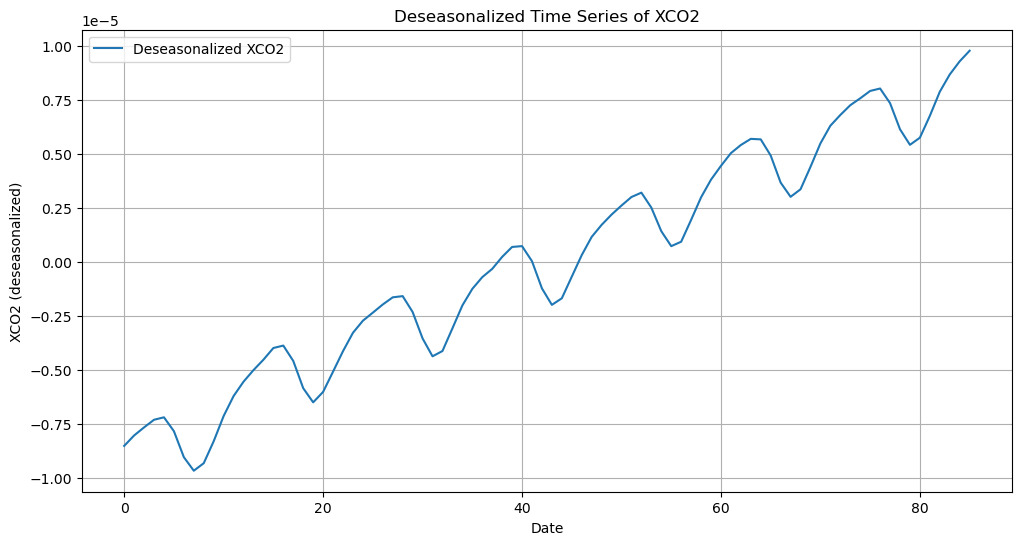

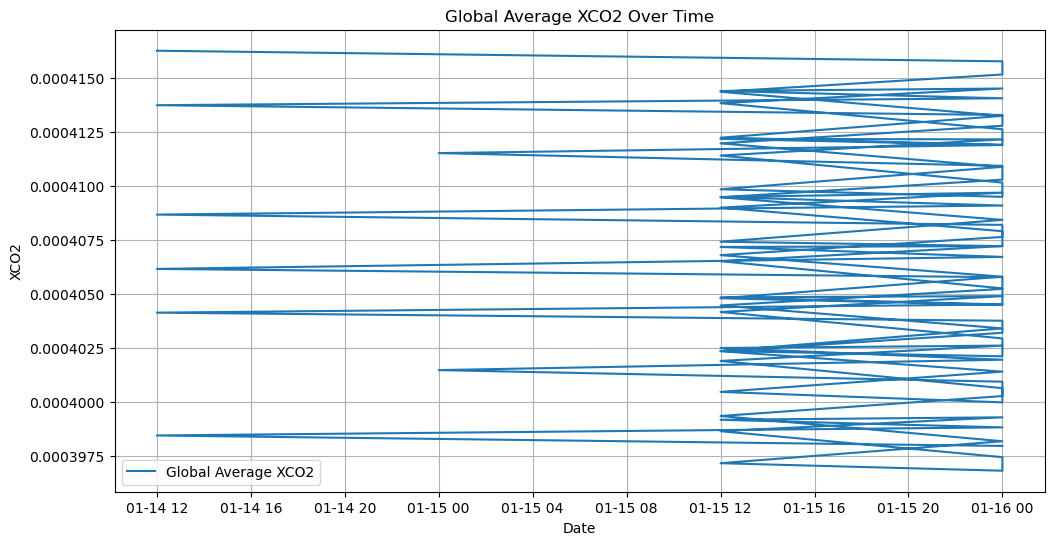

C:\Users\huawei\AppData\Local\Temp\ipykernel_36736\319684827.py:57: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()
C:\Users\huawei\AppData\Local\Temp\ipykernel_36736\319684827.py:58: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg = df.resample('Y').mean()


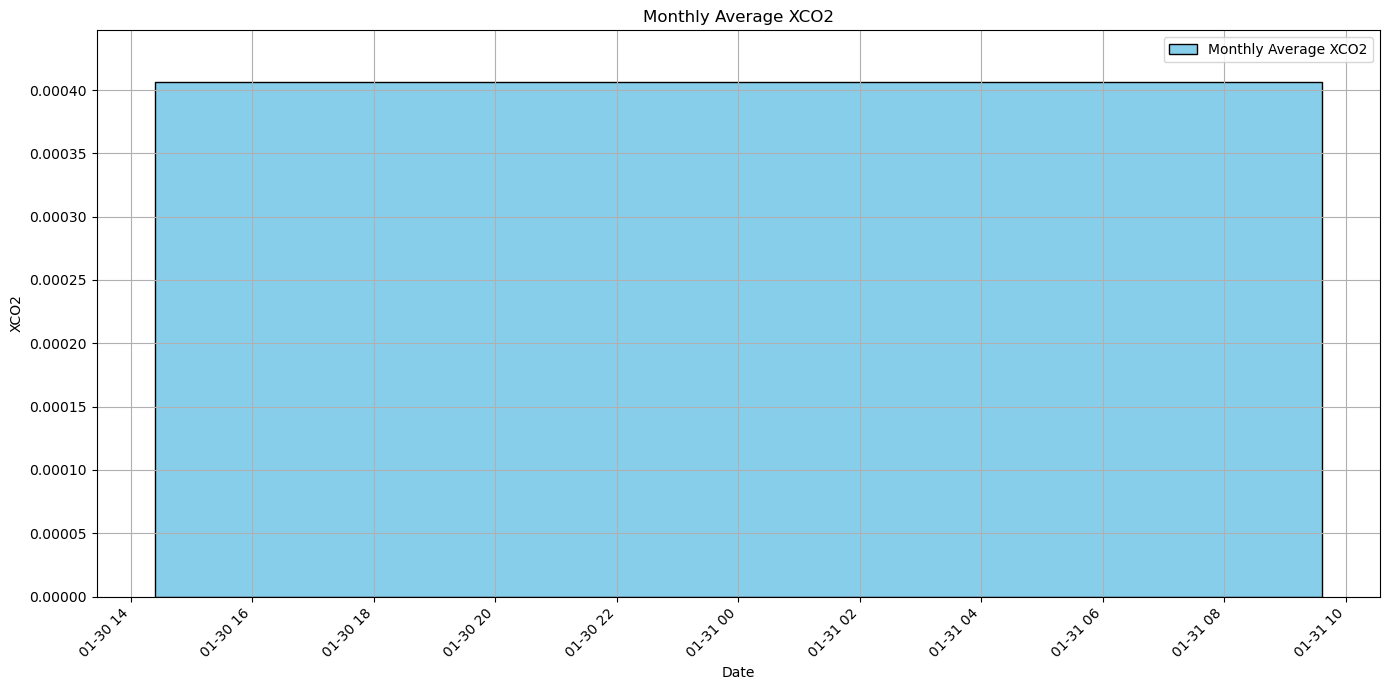

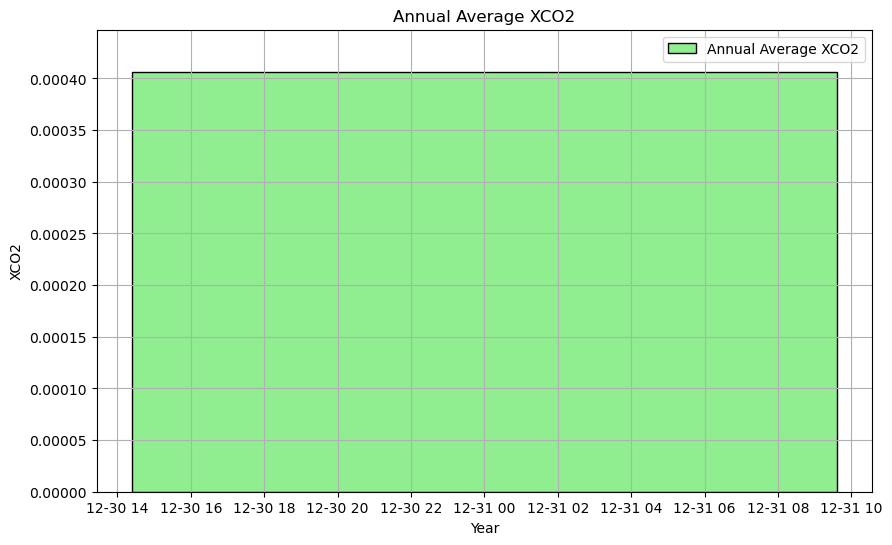

In [98]:
# 第三题
import os
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# 3.1 绘制一个去除了月度季节周期的某个变量的时间序列
data_path = 'D:/ESE/oco2'
data_list = []
# 循环读取所有nc4文件
for filename in os.listdir(data_path):
    if filename.endswith('.nc4'):
        file_path = os.path.join(data_path, filename) # 使用os.path.join函数将目录路径和文件名组合成完整的文件路径
        dataset = nc.Dataset(file_path)
        try:
            time_var = dataset.variables['time'][:]
            xco2_var = dataset.variables['XCO2'][:,:,:].mean(axis=(1,2))  # 将其转换为二维数组（时间、全球平均XCO2）
        except KeyError as e:
            print(f"Error reading {filename}: {e}")
            continue  # 跳过当前文件
        
        base_date = pd.Timestamp('2000-01-01') 
        time_dates = pd.to_datetime(base_date + pd.to_timedelta(time_var, unit='D')) # 将时间转换为datetime对象
        
        data_list.append(pd.DataFrame({'date': time_dates, 'XCO2': xco2_var}))
 
df = pd.concat(data_list, ignore_index=True) # 合并所有数据为一个DataFrame
 
df.set_index('date', inplace=True)
monthly_mean = df.groupby(df.index.to_period('M')).mean()
# NOTE: 这样减去的是总体的均值，而不是月均值 -1
df_deseasonalized = df.groupby(df.index.to_period('M')).apply(lambda x: x - x['XCO2'].mean()).reset_index(drop=True) # 每个数据点减去其所在月的平均值

 
# 绘制去季节化后的时间序列
plt.figure(figsize=(12, 6))
plt.plot(df_deseasonalized.index, df_deseasonalized['XCO2'], label='Deseasonalized XCO2')
plt.xlabel('Date')
plt.ylabel('XCO2 (deseasonalized)')
plt.title('Deseasonalized Time Series of XCO2')
plt.legend()
plt.grid(True)
plt.show()

# 3.2 使用数据集绘制至少5个不同的图
# 3.2.1 全球平均XCO2随时间的变化（保留季节周期）
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['XCO2'], label='Global Average XCO2')
plt.xlabel('Date')
plt.ylabel('XCO2')
plt.title('Global Average XCO2 Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 3.2.2 绘制月度平均值
monthly_avg = df.resample('M').mean()
annual_avg = df.resample('Y').mean()

plt.figure(figsize=(14, 7)) 
plt.bar(monthly_avg.index, monthly_avg['XCO2'], label='Monthly Average XCO2', color='skyblue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('XCO2')
plt.title('Monthly Average XCO2')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.ylim(0, monthly_avg['XCO2'].max() * 1.1) 
plt.show()
 
# 3.2.3 绘制年度平均值
plt.figure(figsize=(10, 6))  
plt.bar(annual_avg.index, annual_avg['XCO2'], label='Annual Average XCO2', color='lightgreen', edgecolor='black') 
plt.xlabel('Year')
plt.ylabel('XCO2')
plt.title('Annual Average XCO2')
plt.legend()
plt.grid(True)
plt.ylim(0, annual_avg['XCO2'].max() * 1.1) 
plt.show()

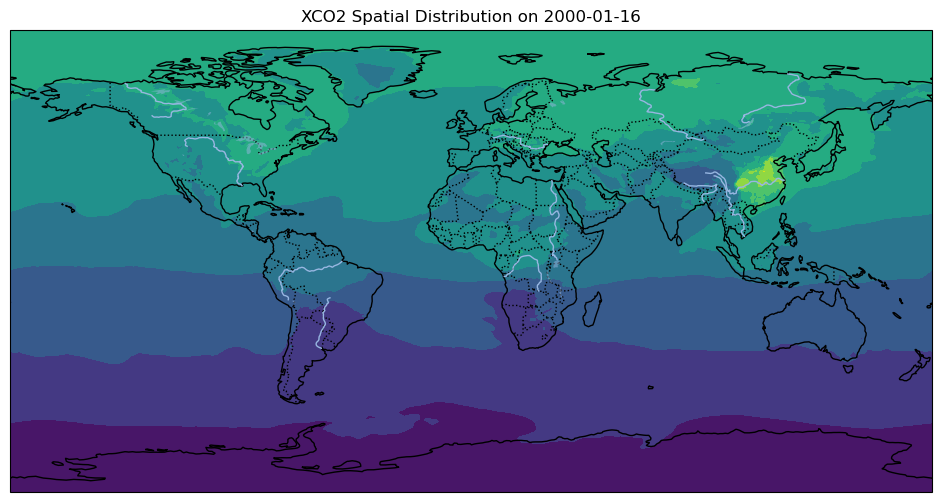

In [13]:
# 3.2.4 2000-01-16全球CO2浓度分布图
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
 
data_path = 'D:/ESE/oco2'
data_dict = {}
 
for filename in os.listdir(data_path):
    if filename.endswith('.nc4'):
        file_path = os.path.join(data_path, filename)
        dataset = nc.Dataset(file_path)
        try:
            time_var = dataset.variables['time'][:]
            xco2_var = dataset.variables['XCO2'][:]
            lat_var = dataset.variables['lat'][:]
            lon_var = dataset.variables['lon'][:]
        except KeyError as e:
            print(f"Error reading {filename}: {e}")
            continue

        base_date = pd.Timestamp('2000-01-01')
        time_dates = pd.to_datetime(base_date + pd.to_timedelta(time_var, unit='D'))
        
        for date, xco2 in zip(time_dates, xco2_var):
            data_dict[date] = (xco2, lat_var, lon_var) # 将数据和日期添加到字典中，以日期为键

selected_date = list(data_dict.keys())[0]
xco2_data, lat_data, lon_data = data_dict[selected_date]
 
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.contourf(lon_data, lat_data, xco2_data, transform=ccrs.PlateCarree(), cmap='viridis')
plt.title(f'XCO2 Spatial Distribution on {selected_date.date()}')
plt.show()

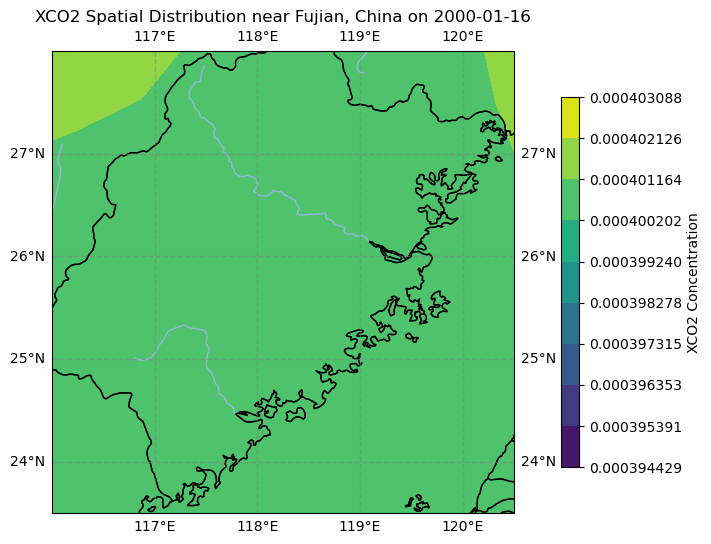

In [106]:
# 3.2.5 福建省附近2000-01-16 CO2浓度分布图
min_lon, max_lon = 116.0, 120.5  # 经度范围
min_lat, max_lat = 23.5, 28.0   # 纬度范围
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()}) # subplot_kw是一个字典，用于传递给subplots函数内部创建的轴对象的构造函数

ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat) # 设置经纬度范围
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES, linestyle='-') 
 
levels = np.linspace(xco2_data.min(), xco2_data.max(), 10)  # 定义等间距级别
contour_set = ax.contourf(lon_data, lat_data, xco2_data, levels=levels, transform=ccrs.PlateCarree(), cmap='viridis') # 绘制等值线图
cbar = plt.colorbar(contour_set, ax=ax, orientation='vertical', pad=0.05, shrink=0.8)
cbar.set_label('XCO2 Concentration')
plt.title(f'XCO2 Spatial Distribution near Fujian, China on {selected_date.date()}')
gl = ax.gridlines(draw_labels=True,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.show()

In [ ]:
以下是第三题所使用的数据集，使用的是群里助教吴星沂发的output_file.zip
https://send.cra.moe/file/g3l7dah2SbtxGVjD/9sEVHj0Bj95RMZuW/oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/4xzD9d0z5hFpt4h0/oco2_GEOS_L3CO2_month_201502_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/IbcSljZg9ewQNIVT/oco2_GEOS_L3CO2_month_201503_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/DIjXkVM1RDks2u2i/oco2_GEOS_L3CO2_month_201504_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/KALgAIyyFWWAK4UR/oco2_GEOS_L3CO2_month_201505_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/UEURu96xCZrMec3g/oco2_GEOS_L3CO2_month_201506_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/gWurP3aj2ut5yY1M/oco2_GEOS_L3CO2_month_201507_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/YKE7LZzRZQjznbX0/oco2_GEOS_L3CO2_month_201508_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/1FiPn87BZ8zoURBM/oco2_GEOS_L3CO2_month_201509_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/fnrrdVATxMC1Dh5J/oco2_GEOS_L3CO2_month_201510_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/P8QKnHQuKEAInTh4/oco2_GEOS_L3CO2_month_201511_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/9LSzMKdZvINu1iPz/oco2_GEOS_L3CO2_month_201512_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/rsgR4H38puUHfycC/oco2_GEOS_L3CO2_month_201601_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/eguHxCLy28u6EAI6/oco2_GEOS_L3CO2_month_201602_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/SR10ULPtV2kboXxx/oco2_GEOS_L3CO2_month_201603_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/93oR0zV2tw1Tp7ps/oco2_GEOS_L3CO2_month_201604_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/pY9MKuD5BKioH8XH/oco2_GEOS_L3CO2_month_201605_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/KMtCdKFq7L0ATnfn/oco2_GEOS_L3CO2_month_201606_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/kArTwWmofXQmc53i/oco2_GEOS_L3CO2_month_201607_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/EDGsn9ZG8Qfps6TJ/oco2_GEOS_L3CO2_month_201608_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/Izli0iqRwoX8EZya/oco2_GEOS_L3CO2_month_201609_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/8khdhA2CYFrO9sNR/oco2_GEOS_L3CO2_month_201610_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/KlRs6KLbErgEGfo9/oco2_GEOS_L3CO2_month_201611_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/kLjUojxTwL6myMDc/oco2_GEOS_L3CO2_month_201612_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/fxC0Rni0kIuk5anX/oco2_GEOS_L3CO2_month_201701_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/3AUyOyjeGy5LidOD/oco2_GEOS_L3CO2_month_201702_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/Y1pgp5BtpOG9aVMT/oco2_GEOS_L3CO2_month_201703_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/OZeoveB8w3LMOTHw/oco2_GEOS_L3CO2_month_201704_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/mLx0GmBv1IP9bBuc/oco2_GEOS_L3CO2_month_201705_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/WolOrQyjIIvfne3f/oco2_GEOS_L3CO2_month_201706_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/WeGJALH26y4KPCAD/oco2_GEOS_L3CO2_month_201707_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/X78fRWjMPQH6Hczb/oco2_GEOS_L3CO2_month_201708_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/2cMce7c7BUAbIPsI/oco2_GEOS_L3CO2_month_201709_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/WDna9z3eVznjj3nB/oco2_GEOS_L3CO2_month_201710_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/hdftiBQBDjoG8p7x/oco2_GEOS_L3CO2_month_201711_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/r2HRHOIQ894guTQH/oco2_GEOS_L3CO2_month_201712_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/lvfP18Kf1xwmHmF0/oco2_GEOS_L3CO2_month_201801_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/NxxFXSpL1WXQIK6Y/oco2_GEOS_L3CO2_month_201802_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/SqZopKnUQ1bTEMQ4/oco2_GEOS_L3CO2_month_201803_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/6Bc0F43DJuwZj3uV/oco2_GEOS_L3CO2_month_201804_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/6GO0RP0oJYTDKX4s/oco2_GEOS_L3CO2_month_201805_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/Md7F8z9gKKJ67OK9/oco2_GEOS_L3CO2_month_201806_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/M9bBfSTnfzZzGhgI/oco2_GEOS_L3CO2_month_201807_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/suwR1M5D7LBwQSO5/oco2_GEOS_L3CO2_month_201808_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/NKOWA7sgGoPrvgDr/oco2_GEOS_L3CO2_month_201809_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/F5Dtd7htcPAhp4MI/oco2_GEOS_L3CO2_month_201810_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/NzsVsCdPSQ649INc/oco2_GEOS_L3CO2_month_201811_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/R3T4yCrHJKTVhOAb/oco2_GEOS_L3CO2_month_201812_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/q18gJQ8sDPYInezP/oco2_GEOS_L3CO2_month_201901_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/kLDmV71KWGMG5KZy/oco2_GEOS_L3CO2_month_201902_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/x2BeYXX7UBYthl7G/oco2_GEOS_L3CO2_month_201903_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/hpELO0kfdmTNkyHP/oco2_GEOS_L3CO2_month_201904_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/fuCPXH7gDIyq5e4u/oco2_GEOS_L3CO2_month_201905_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/01f5sRP3tuTimZ2v/oco2_GEOS_L3CO2_month_201906_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/1sYWyiUB2uh0cQk8/oco2_GEOS_L3CO2_month_201907_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/mHgpYZUD5XpIBxq0/oco2_GEOS_L3CO2_month_201908_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/oqglBPEBdLkPLXfX/oco2_GEOS_L3CO2_month_201909_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/DpvpUCd4MFbDWbnK/oco2_GEOS_L3CO2_month_201910_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/QplIvxBcrGIilLCH/oco2_GEOS_L3CO2_month_201911_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/n2LoKUoYB0zKjjIz/oco2_GEOS_L3CO2_month_201912_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/8zKdbpi3Z7eEfawS/oco2_GEOS_L3CO2_month_202001_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/sGytvudPArUbvaoR/oco2_GEOS_L3CO2_month_202002_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/TXZ2utkM7W1khV9b/oco2_GEOS_L3CO2_month_202003_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/GQ9Bx077GHOZCAdX/oco2_GEOS_L3CO2_month_202004_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/ACAtb7vrJSIw0IjI/oco2_GEOS_L3CO2_month_202005_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/lZ0QX2Gxlj8zqyoZ/oco2_GEOS_L3CO2_month_202006_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/utVlaWs0N5VUsshn/oco2_GEOS_L3CO2_month_202007_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/AHpujSeY3TRnyftB/oco2_GEOS_L3CO2_month_202008_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/5aOyOfVM4ch1PnoD/oco2_GEOS_L3CO2_month_202009_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/E1Bq01xSkLr9FoRA/oco2_GEOS_L3CO2_month_202010_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/scCJrtD6dQn7kusZ/oco2_GEOS_L3CO2_month_202011_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/BwJARrVAvds0NYib/oco2_GEOS_L3CO2_month_202012_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/ISuvTaRoH1ceX24d/oco2_GEOS_L3CO2_month_202101_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/xWj2XWwTQ5dVlXda/oco2_GEOS_L3CO2_month_202102_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/qHkCyhcdOKco2nls/oco2_GEOS_L3CO2_month_202103_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/ixwH6awViTekgDC0/oco2_GEOS_L3CO2_month_202104_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/aEyUaMHVeMNJp9UT/oco2_GEOS_L3CO2_month_202105_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/KoHuKAWzroUzPqJ9/oco2_GEOS_L3CO2_month_202106_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/yVcy7kB5ohX1fga6/oco2_GEOS_L3CO2_month_202107_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/3uxRZjcLRapvI1bD/oco2_GEOS_L3CO2_month_202108_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/IutuWpVbQwJRC4Ih/oco2_GEOS_L3CO2_month_202109_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/ab8Mkuvo3KBorfyd/oco2_GEOS_L3CO2_month_202110_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/WDVuDKDDHcAjoRvL/oco2_GEOS_L3CO2_month_202111_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/qv8PDO2eGoElWXsh/oco2_GEOS_L3CO2_month_202112_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/EN89Q2W305GbQP57/oco2_GEOS_L3CO2_month_202201_B10206Ar.nc4
https://send.cra.moe/file/g3l7dah2SbtxGVjD/jT7OnE7t4V7XN3DC/oco2_GEOS_L3CO2_month_202202_B10206Ar.nc4